In [35]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [36]:
with open("data2.json", "r") as fp:
  data = json.load(fp)

X = np.array(data["mfcc"])
y = np.array(data["labels"])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [38]:
model = Sequential([
  Flatten(input_shape=(X_train.shape[1], X_train.shape[2])),
  Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
  Dropout(0.3),  # overfitting issue fixed
  
  Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
  Dropout(0.3),
  
  Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
  Dropout(0.3),
  
  # output
  Dense(3, activation='softmax')
])

In [42]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              # loss='binary_crossentropy',
              # loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 3367)              0         
                                                                 
 dense_24 (Dense)            (None, 512)               1724416   
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 64)                16448     
                                                                 
 dropout_14 (Dropout)        (None, 64)               

In [43]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)

Epoch 1/50
4/4 [==============================] - 1s 42ms/step - loss: 40.2593 - accuracy: 0.3125 - val_loss: 17.2690 - val_accuracy: 0.4375
Epoch 2/50
4/4 [==============================] - 0s 16ms/step - loss: 35.7397 - accuracy: 0.4062 - val_loss: 13.7425 - val_accuracy: 0.4062
Epoch 3/50
4/4 [==============================] - 0s 15ms/step - loss: 23.4305 - accuracy: 0.4844 - val_loss: 15.0404 - val_accuracy: 0.4062
Epoch 4/50
4/4 [==============================] - 0s 14ms/step - loss: 18.9508 - accuracy: 0.5078 - val_loss: 14.4171 - val_accuracy: 0.3750
Epoch 5/50
4/4 [==============================] - 0s 14ms/step - loss: 18.9403 - accuracy: 0.4688 - val_loss: 6.6303 - val_accuracy: 0.5938
Epoch 6/50
4/4 [==============================] - 0s 14ms/step - loss: 18.3631 - accuracy: 0.4688 - val_loss: 5.5211 - val_accuracy: 0.5000
Epoch 7/50
4/4 [==============================] - 0s 14ms/step - loss: 15.9977 - accuracy: 0.4766 - val_loss: 5.4021 - val_accuracy: 0.4688
Epoch 8/50
4/4 [

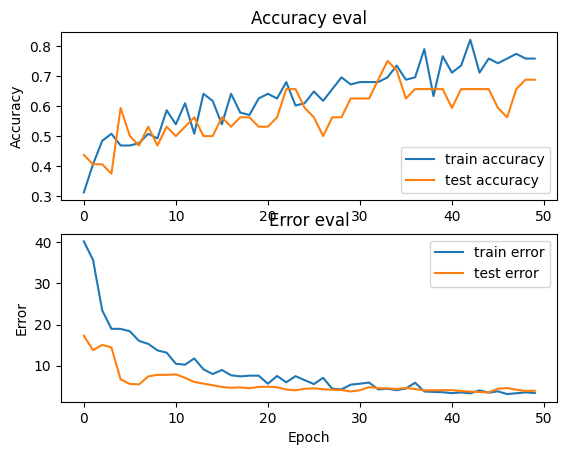

In [44]:
fig, axs = plt.subplots(2)

# create accuracy sublpot
axs[0].plot(history.history["accuracy"], label="train accuracy")
axs[0].plot(history.history["val_accuracy"], label="test accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy eval")

# create error sublpot
axs[1].plot(history.history["loss"], label="train error")
axs[1].plot(history.history["val_loss"], label="test error")
axs[1].set_ylabel("Error")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc="upper right")
axs[1].set_title("Error eval")

plt.show()

In [45]:
loss, accuracy = model.evaluate(X_test, y_test)
f'Loss: {loss}, Accuracy: {accuracy}'

1/1 [==============================] - 0s 18ms/step - loss: 3.8614 - accuracy: 0.6875


'Loss: 3.861424446105957, Accuracy: 0.6875'